In [4]:
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../src/')
import geometry
import solver


this notebook investigates a pipe with 2 obstructions, and see in the middle of the obstruction, will the flow return to poiseuille. 

In [5]:
double_obs_tube = geometry.doubly_obstructed_tube()
t = double_obs_tube.get_t()
n = len(double_obs_tube.a)
n

14336

and $5h$ rule say

In [6]:
5*np.max(np.abs(np.diff(t)))

0.07285519164023313

so I guess up to $y=0.9$ will be fine 

In [7]:
u = np.zeros(n)
v = np.zeros(n)
u[np.abs(t.real) > 30] = (1-t.imag**2)[np.abs(t.real) > 30]

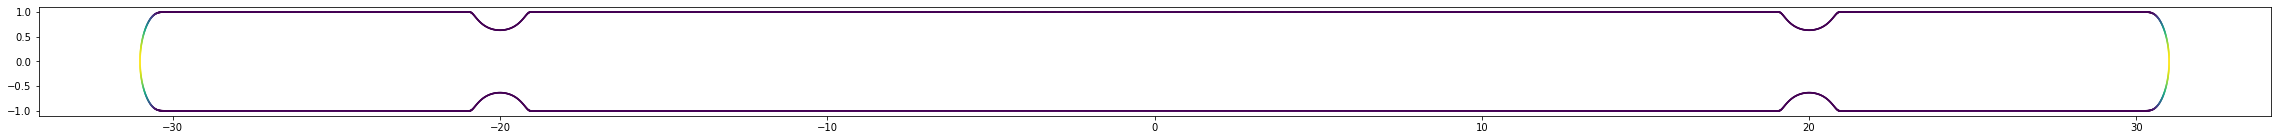

In [8]:
plt.figure(figsize=(40,2))
plt.scatter(t.real,t.imag,s=0.5,c=u)

In [9]:
solution = solver.stokes2d(double_obs_tube, u, v)

gmres starts solving the Nystorm, please wait...
gmres converged


# return to poiseuille

In [16]:
grid_x = np.linspace(-30,30,1000)
grid_y = np.linspace(0,0.9,10)

Text(0.5, 1.0, 'abs velocity difference to the poiseuille flow in the pipe with double obstruction')

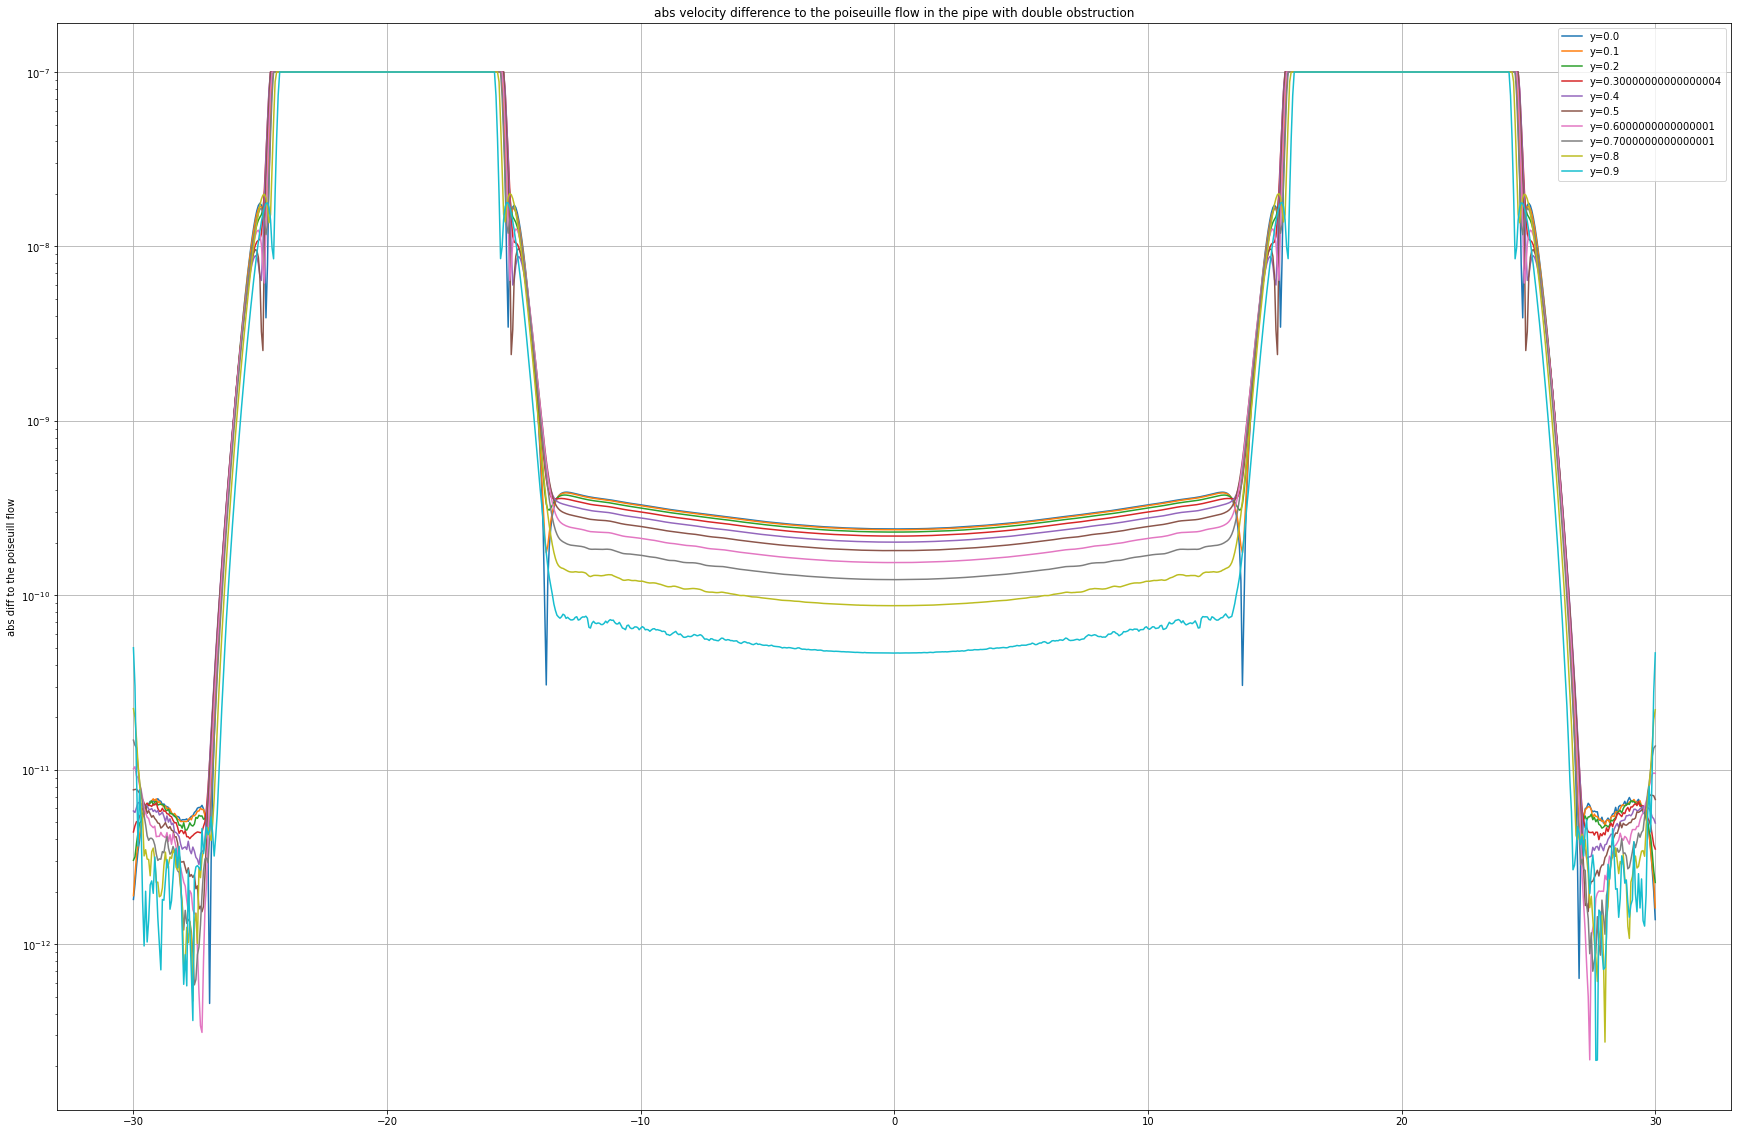

In [18]:
plt.figure(figsize=(30,20))
for y in grid_y:
    z = grid_x + y*1j
    v = solution.compute_velocity(z)
    poi_v = 1 - z.imag**2
    abs_diff = np.min([np.abs(v-poi_v),1e-7*np.ones(len(v))],axis=0) # the max cuts down the unimportant error
    plt.semilogy(grid_x,abs_diff,label='y='+str(y))
# plt.semilogy(grid_x,np.ones(len(grid_x))*1e-9,'--',label='1e-9')
# plt.semilogy(grid_x,np.ones(len(grid_x))*5e-10,'--',label='5e-9')

plt.ylabel('abs diff to the poiseuill flow')
plt.legend()
plt.grid('both')
plt.title('abs velocity difference to the poiseuille flow in the pipe with double obstruction')